In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
from scipy.stats import norm
from matplotlib.animation import FuncAnimation
import time

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 15

In [ ]:
#assigning parameters
#format:pi,mu1,mu,sig1,sig2



params=[[0.50,0.0,1.0,0.8,0.4],
        [0.10,0.0,1.0,0.8,0.4]]
    
n_vals=np.array([10,1000,10000])

In [ ]:
#generate observations
def genObs(params,n):
    np.random.seed(seed=42)
    pi,mu1,mu2,sig1,sig2=params
    W=np.random.binomial(size=n,n=1,p=1-pi)
    Y1=np.random.normal(loc = mu1, scale=sig1, size=n)
    Y2=np.random.normal(loc = mu2, scale=sig2, size=n)
    X=W*Y1+(1-W)*Y2
    return X


#use updatePi=False for no updates to pi
def est(x,startParams,runs=1000,updatePi=True,plot=False,convergence=False,epsilon=None):
    pi_0,mu1_0,mu2_0,sig1_0,sig2_0=startParams
    flag=False
    i_convergence=0
    if updatePi==False:
            pi_cap=pi_0
            
    if plot==True:
        if updatePi==True:
            pi_data=[]
        mu1_data=[]
        mu2_data=[]
        sig1_data=[]
        sig2_data=[]
        xdata=[]
            
            
    for i in range(runs):
        f1_0=lambda x:(1.0/sig1_0)*norm.pdf((x-mu1_0)/sig1_0)
        f2_0=lambda x:(1.0/sig2_0)*norm.pdf((x-mu2_0)/sig2_0)

        r=pi_0*f2_0(x)/((1-pi_0)*f1_0(x)+pi_0*f2_0(x))
        
        mu1_cap=np.sum((1-r)*x)/np.sum(1-r)
        mu2_cap=np.sum(r*x)/np.sum(r)
        
        sig1_cap=np.sqrt(np.sum((1-r)*np.square(x-mu1_cap))/np.sum(1-r))
        sig2_cap=np.sqrt(np.sum(r*np.square(x-mu2_cap))/np.sum(r))
        
        if updatePi==True:
            pi_cap=np.mean(r)
        
        if convergence==True and flag==False:
            theta_0=np.array([pi_0,mu1_0,mu2_0,sig1_0,sig2_0])
            theta_cap=np.array([pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap])
            if np.max(np.abs(theta_cap-theta_0))<epsilon:
                i_convergence=i
                flag=True
            
        if updatePi==True:
            pi_0,mu1_0,mu2_0,sig1_0,sig2_0=pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap
        else:
            mu1_0,mu2_0,sig1_0,sig2_0=mu1_cap,mu2_cap,sig1_cap,sig2_cap
        
        
        if plot==True:
            mu1_data.append(mu1_cap)
            mu2_data.append(mu1_cap)
            sig1_data.append(sig1_cap)
            sig2_data.append(sig2_cap)
            if updatePi==True:
                pi_data.append(pi_cap)

            xdata.append(i)

    if plot==True:
        if updatePi==True:
            fig,axes = plt.subplots(3,2,figsize=(9,12))
            ax1,ax2,ax3,ax4,ax5 = axes[0 , 0],axes[1, 0],axes[0,1],axes[1, 1],axes[2,0]
        else:
            fig,axes = plt.subplots(2,2,figsize=(9,9))
            ax1,ax2,ax3,ax4 = axes[0 , 0],axes[1, 0],axes[0,1],axes[1, 1]
    
    
    ax1.plot(xdata,mu1_data)
    ax1.set_title("$\mu_1$ vs iterations")
    ax1.set_xlabel("No of iterations")
    ax1.set_ylabel(r"$\mu_{1}$")
    
    ax2.plot(xdata,mu2_data)
    ax2.set_title(r"$\mu_{2}$ vs iterations")
    ax2.set_xlabel("No of iterations")
    ax2.set_ylabel(r"$\mu_{2}$")


    ax3.plot(xdata,sig1_data)
    ax3.set_title(r"$\sigma_1$ vs iterations")
    ax3.set_xlabel("No of iterations")
    ax3.set_ylabel(r"$\sigma_1$ ")

    
    ax4.plot(xdata,sig2_data)
    ax4.set_title(r"$\sigma_2$ vs iterations")
    ax4.set_xlabel("No of iterations")
    ax4.set_ylabel(r"$\sigma_2$ ")

    if updatePi==True:
        ax5.plot(xdata,pi_data)
        ax5.set_title(r"$\pi$ vs iterations")
        ax5.set_xlabel("No of iterations")
        ax5.set_ylabel(r"$\pi$")
    # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
    plt.tight_layout()
    plt.show()
    

    if convergence==True and i_convergence!=0:
        print("\nIterations for convergence=",i_convergence)
    else:
        print("\nEstimate has not converged yet, get more runs pls\n")
    
    
    return(pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap)

In [ ]:
def est_1(x, startParams, title, runs=1000, updatePi=True, plot=False, convergence=False, epsilon=1e-6):
    
    pi_0,mu1_0,mu2_0,sig1_0,sig2_0 = startParams
    

    iter_convergence=0

    if updatePi==False:
            pi_cap=pi_0
            
    #Initializing lists for future storage
    
            
    if plot==True:
        if updatePi==True:
            pi_data=[]
        mu1_data=[]
        mu2_data=[]
        sig1_data=[]
        sig2_data=[]
        xdata=[]
    
    run=0 
    
    while (convergence == False and run<runs):      
    
        f1_0=lambda x:(1.0/sig1_0)*norm.pdf((x-mu1_0)/sig1_0)
        f2_0=lambda x:(1.0/sig2_0)*norm.pdf((x-mu2_0)/sig2_0)
        
        #Parameter Update
        r=pi_0*f2_0(x)/((1-pi_0)*f1_0(x)+pi_0*f2_0(x))
        
        mu1_cap=np.sum((1-r)*x)/np.sum(1-r)
        mu2_cap=np.sum(r*x)/np.sum(r)
        
        sig1_cap=np.sqrt(np.sum((1-r)*np.square(x-mu1_cap))/np.sum(1-r))
        sig2_cap=np.sqrt(np.sum(r*np.square(x-mu2_cap))/np.sum(r))
        if updatePi==True:
            pi_cap=np.mean(r)
        
        
        # Creating old and new parameter array
        theta_0=np.array([pi_0,mu1_0,mu2_0,sig1_0,sig2_0])
        theta_cap=np.array([pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap])
        
        #Convergence condition
        if (np.max(np.abs(theta_cap-theta_0))< epsilon):
            iter_convergence=run
            convergence=True
        
        else:
            pi_0,mu1_0,mu2_0,sig1_0,sig2_0=pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap
        
        #Storing parameter values
        
        if plot==True:
            mu1_data.append(mu1_cap)
            mu2_data.append(mu2_cap)
            sig1_data.append(sig1_cap)
            sig2_data.append(sig2_cap)
            if updatePi==True:
                pi_data.append(pi_cap)

            xdata.append(run)
            
        run = run +1

    
    if convergence==True and run!=runs:
        print("\nIterations for convergence=",iter_convergence)
    else:
        print("\nEstimate has not converged yet, more runs needed\n")
    
    
    print(pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap)
    
    
    if plot==True:
        if updatePi==True:
            fig,axes = plt.subplots(3,2,figsize=(9,12))
            ax1,ax2,ax3,ax4,ax5 = axes[0 , 0],axes[1, 0],axes[0,1],axes[1, 1],axes[2,0]
            axes[2,1].set_axis_off()
        else:
            fig,axes = plt.subplots(2,2,figsize=(9,9))
            ax1,ax2,ax3,ax4 = axes[0 , 0],axes[1, 0],axes[0,1],axes[1, 1]
    
        ax1.plot(xdata,mu1_data)
        ax1.set_title("$\mu_1$ vs iterations")
        ax1.set_xlabel("No of iterations")
        ax1.set_ylabel(r"$\mu_{1}$")

        ax2.plot(xdata,mu2_data)
        ax2.set_title(r"$\mu_{2}$ vs iterations")
        ax2.set_xlabel("No of iterations")
        ax2.set_ylabel(r"$\mu_{2}$")


        ax3.plot(xdata,sig1_data)
        ax3.set_title(r"$\sigma_1$ vs iterations")
        ax3.set_xlabel("No of iterations")
        ax3.set_ylabel(r"$\sigma_1$ ")


        ax4.plot(xdata,sig2_data)
        ax4.set_title(r"$\sigma_2$ vs iterations")
        ax4.set_xlabel("No of iterations")
        ax4.set_ylabel(r"$\sigma_2$ ")
        plt.suptitle(title)

        if updatePi==True:
            ax5.plot(xdata,pi_data)
            ax5.set_title(r"$\pi$ vs iterations")
            ax5.set_xlabel("No of iterations")
            ax5.set_ylabel(r"$\pi$")
        # plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
        
        plt.tight_layout()
        plt.show()


In [ ]:
# no of observations
numbers=[10, 1000, 10000]


Iterations for convergence= 13
0.6002263595206951 -0.500852408354075 0.5931859141771542 0.18166190987335964 0.2572128574056691


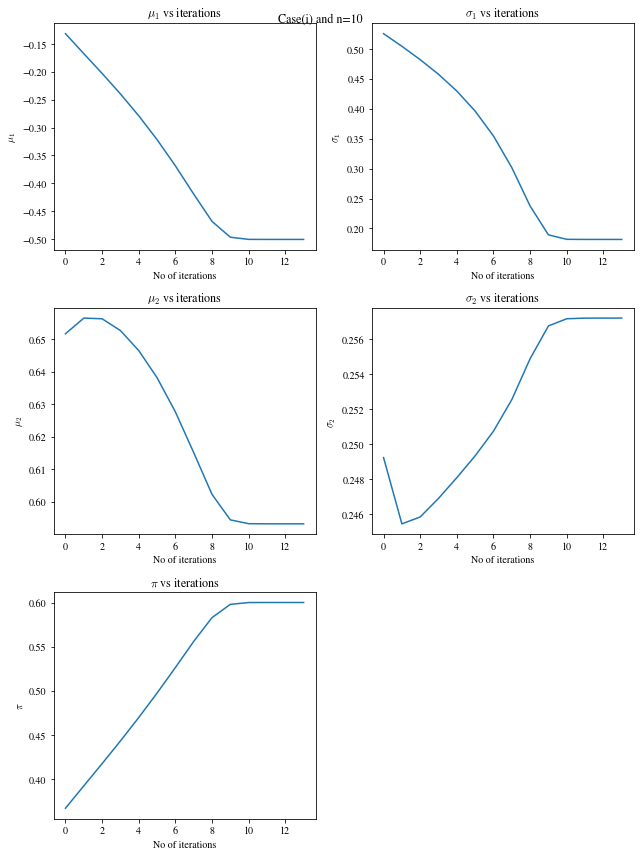


Iterations for convergence= 522
0.5302187153723182 0.034464024056089726 0.9699812711290363 0.8079054179616397 0.4158004016408088


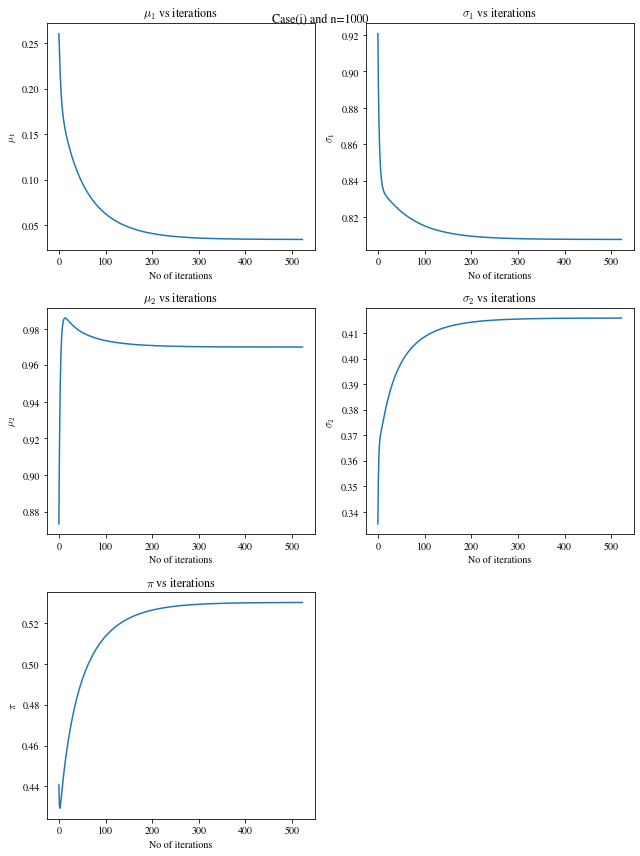


Iterations for convergence= 287
0.5162708534411812 -0.016400766344725867 0.9988792135917581 0.7888130807947855 0.40032036678586924


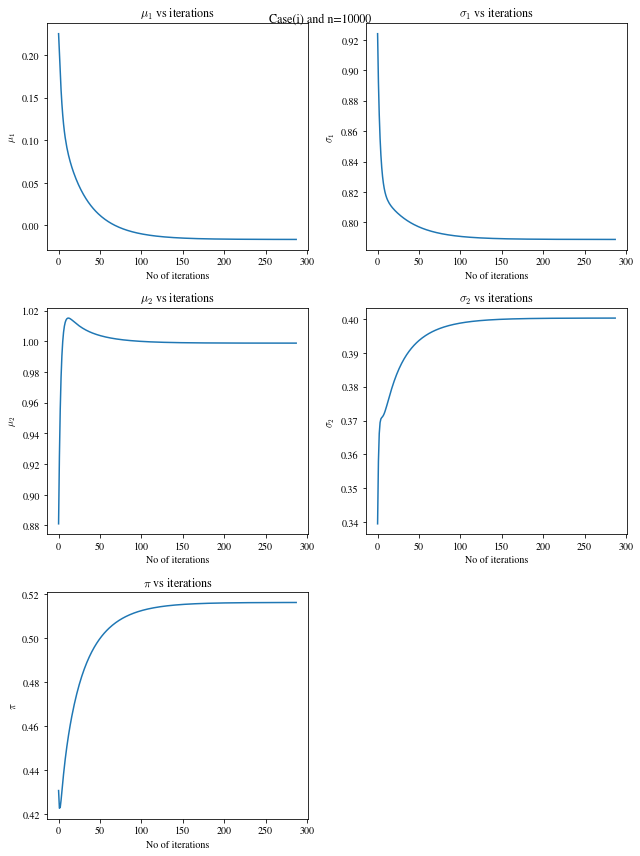

In [ ]:
for n in numbers:
  X=genObs(params[0],n)
  # print(est(X,[0.45,0.1,0.8,0.9,0.3],updatePi=True,plot=True,convergence=True,epsilon=1e-6))
  est_1(X,[0.45,0.1,0.8,0.9,0.3],updatePi=True,plot=True,epsilon=1e-6,title=f'Case(i) and n={n}')


Iterations for convergence= 11
0.3997736436424987 0.5931859187256534 -0.5008524065267255 0.25721284984452736 0.18166191160770437


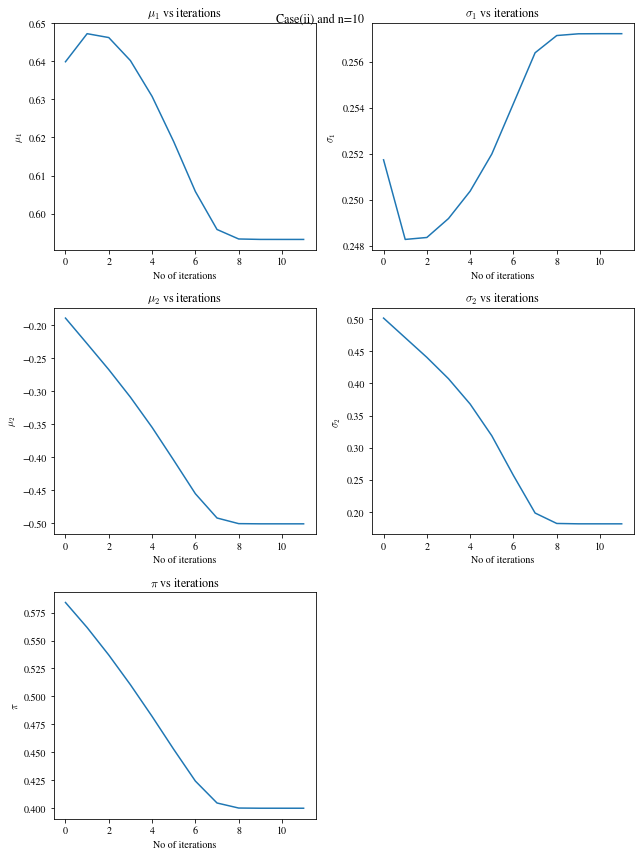


Iterations for convergence= 501
0.46978099441847987 0.9699812088076067 0.034463516475514704 0.4158005252650633 0.8079052764427396


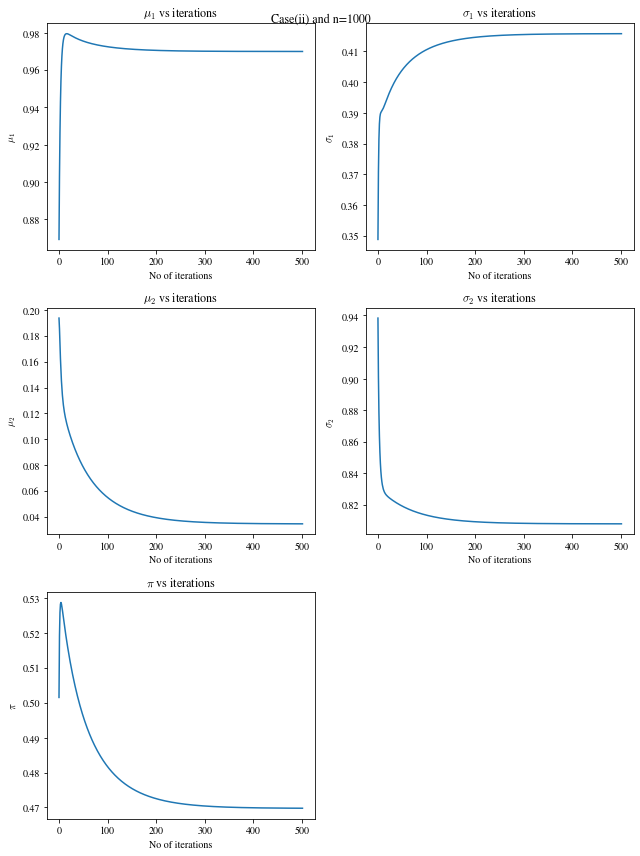


Iterations for convergence= 273
0.4837288488176614 0.9988791232062513 -0.01640129479616558 0.40032048487681615 0.7888129190661352


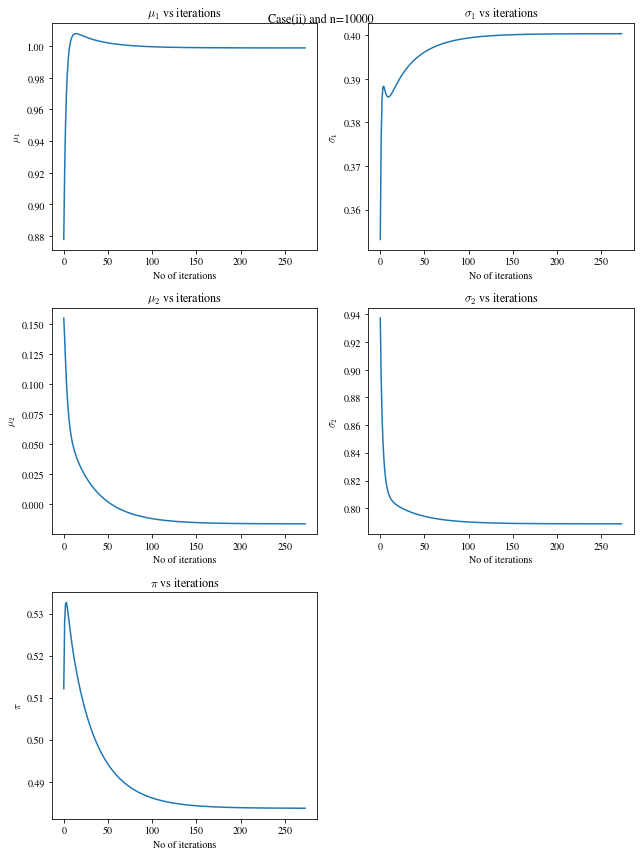

In [ ]:
for n in numbers:
  X=genObs(params[0],n)
  est_1(X,[0.45,0.8,0.1,0.3,0.9],updatePi=True,plot=True,epsilon=1e-6,title=f'Case(ii) and n={n}')


Iterations for convergence= 19
0.2643105420327362 -0.7055243845788642 0.29547208759543303 0.5071836399761293 0.10289487529905592


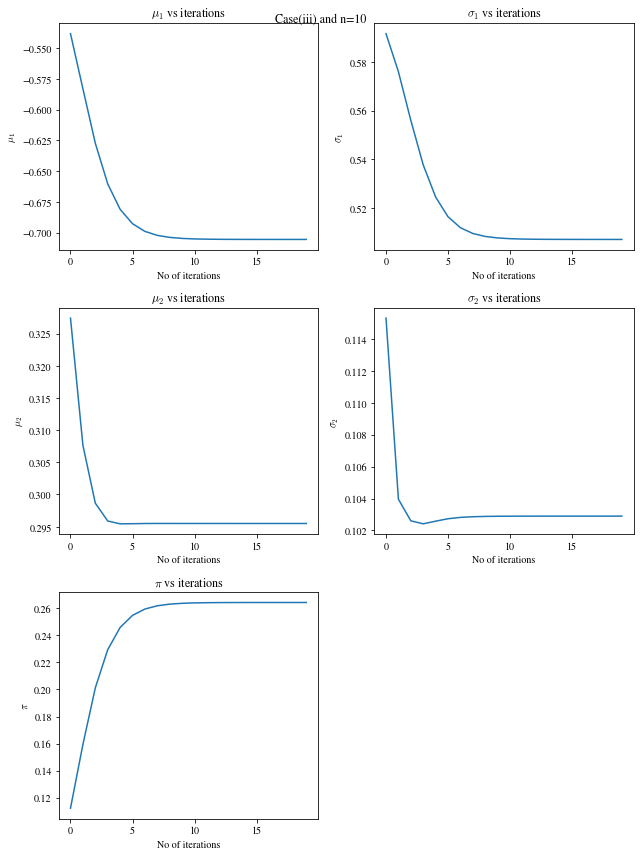


Iterations for convergence= 299
0.10939912874760316 0.06281667751070598 1.25760924250397 0.7622217096098864 0.3239463556150324


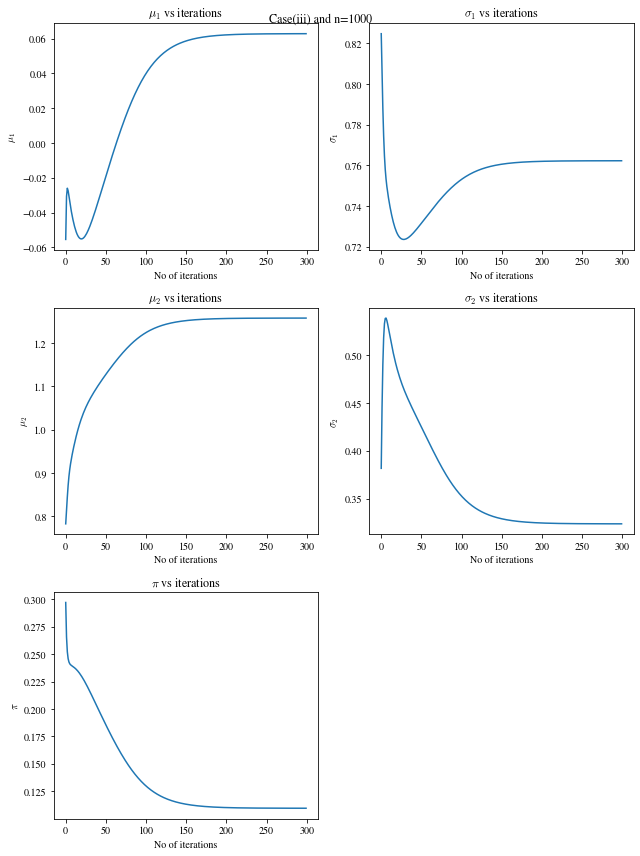


Iterations for convergence= 762
0.08695734821368167 0.01396746412289636 1.051824044262981 0.8005330506592051 0.3706760943315047


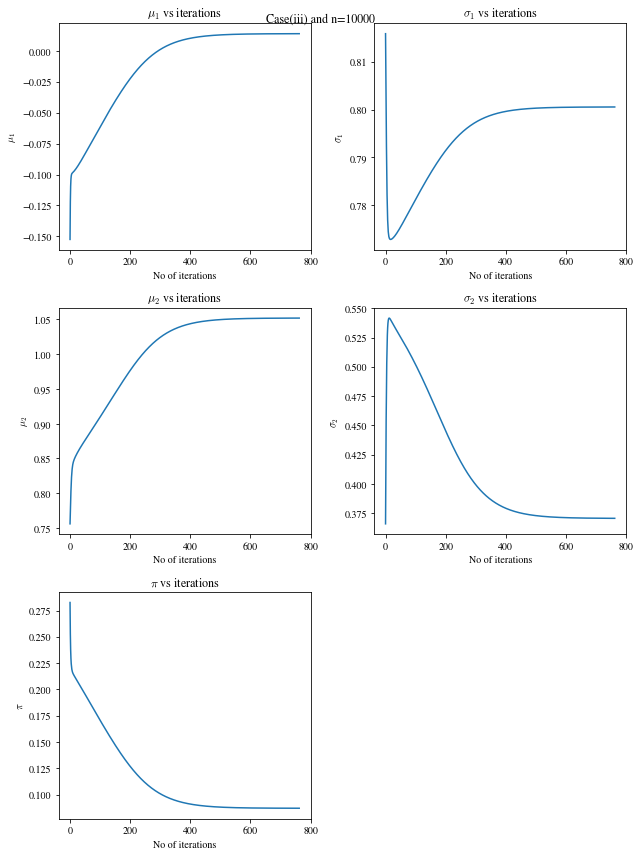

In [ ]:
for n in numbers:
  X=genObs(params[1],n)
  # print(est(X,[0.45,0.1,0.8,0.9,0.3],updatePi=True,plot=True,convergence=True,epsilon=1e-6))
  est_1(X,[0.45,0.1,0.8,0.9,0.3],updatePi=True,runs=2000,plot=True,epsilon=1e-6,title=f'Case(iii) and n={n}')

Observations: 
* The convergence of the em algo depends on where you start and the sample size.
*   This happens because the function has many local optima instead of 1 global maximum.
*  If n is small, then it converges in a much smaller no of iterations.
*  But a very small n results in significant deviations from the true values.
* For case (ii), in addition to n=10 and n=1000, even at n=10000, there appears to be a significant discrepancy between the true values and the EM predicted values

